# Tests

## 1. Iterations Tests

Let's consider task of minimization for convex quadratic form on fixed square when there is global solution in this square.

<IPython.core.display.Javascript object>


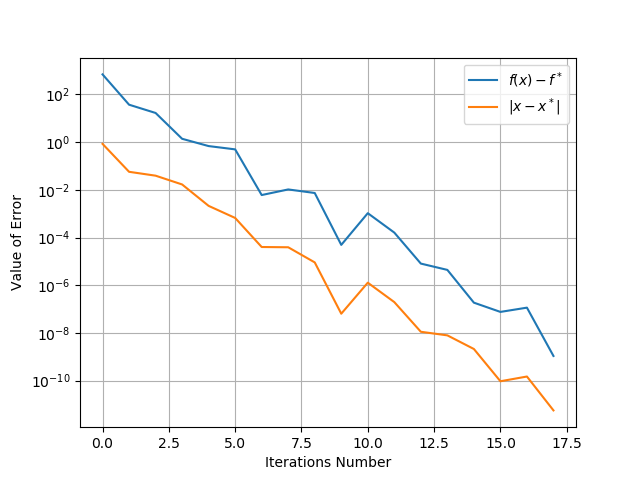

Theoretical Iteration Number through function constant 36.0
Theoretical Iteration Number through gradient constant 19.0


In [2]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import comparison
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
res = comparison.qf_test(1e-8)

Now we consider task of minimization for convex quadratic form on fixed square when there is not global solution in this square.

<IPython.core.display.Javascript object>


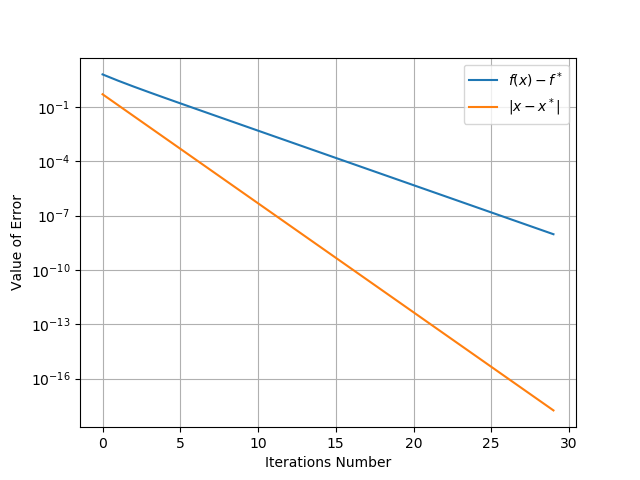

Theoretical Iteration Number through function constant 30.0
Theoretical Iteration Number through gradient constant 14.0


In [3]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import comparison
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
res = comparison.qf_test_2(1e-8)

## 2. Estimates For Accuracy Of Solution On Segment

There are three strategies for to stop search of solution on segment. Below $\delta$ is a distance between current point-approximation and accurate solution.

* **The first strategy** - Little big
$$\delta \leq \frac{M_{der}}{L},$$

where $L$ is a Lipschitz constant for *gradient*, $M_{der}$ is a lower bound of derivative with the respect to $y$ for parallel to axis $Ox$ segment and derivative with the respect to $x$ for parallel to axis $Oy$ segment in point solution on segment. For this strategy an estimate is computed on each new segment. This strategy is workable (see theorem 4.1 in [Description of method](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/One%20method.pdf))

* **The second strategy** - Constant estimate for all segments

$$\delta \leq \frac{\epsilon}{2La\sqrt{5}\log_2\frac{2Ma\sqrt{2}}{\epsilon}},$$

where $L$ and $M$ are Lipschitz constant for *gradient* and *function*, $a$ is a size of square, $\epsilon$ is a required accuracy of initial task's solution. This strategy requires to compute the estimate one time for the one start method. There is proof for this istimate in theorem 1 in [Article of Pasechnyuk and Stonyakin](https://arxiv.org/pdf/1812.10300.pdf).

* **The third strategy** - Comparison with gradient in current point

$$\delta \leq \frac{|f'(\textbf{x}_{cur})|}{L},$$

where $\textbf{x}_{cur}$ is current point-approximation, $L$ is a Lipschitz constant for *gradient*. The $f'(\textbf{x}_{cur})$ is a derivative with the respect to $x$ for parallel to axis $Oy$ segment and is a derivative with the respect to $y$ for parallel to axis $Ox$.

**Important remark**: in the halving square method we use golden search selection as method that solve one-dimensional task.

## 2.1. Comparison For Quadric Functions

In [4]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import estimates
%matplotlib notebook

epsilon = [0.1**(i) for i in range(7)]
estimates.get_tests_estimates(epsilon)

eps =  1.0e+00
Mean time (True gradient) = 0.64ms
Mean time (Constant estimate) = 1.24ms
Mean time (Current gradient) = 0.66ms
eps =  1.0e-01
Mean time (True gradient) = 1.10ms
Mean time (Constant estimate) = 2.57ms
Mean time (Current gradient) = 1.15ms
eps =  1.0e-02
Mean time (True gradient) = 1.80ms
Mean time (Constant estimate) = 4.82ms
Mean time (Current gradient) = 1.93ms
eps =  1.0e-03
Mean time (True gradient) = 2.38ms
Mean time (Constant estimate) = 7.05ms
Mean time (Current gradient) = 2.56ms
eps =  1.0e-04
Mean time (True gradient) = 3.02ms
Mean time (Constant estimate) = 9.75ms
Mean time (Current gradient) = 3.22ms
eps =  1.0e-05
Mean time (True gradient) = 3.60ms
Mean time (Constant estimate) = 13.02ms
Mean time (Current gradient) = 3.91ms
eps =  1.0e-06
Mean time (True gradient) = 4.29ms
Mean time (Constant estimate) = 16.66ms
Mean time (Current gradient) = 4.64ms


## 3. Comparison With Other Methods

In [1]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook

N = 2
results, f = comparison.comparison_LogSumExp(N)

4.123105625617661
There is not code
{'f': <bound method LogSumExp.calculate_function of <test_functions.LogSumExp object at 0xb3ec524c>>, 'get_time': True}
{'f': <bound method LogSumExp.calculate_function of <test_functions.LogSumExp object at 0xb3ec524c>>, 'eps': None, 'minimum': None, 'get_time': True}
{'f': <bound method LogSumExp.calculate_function of <test_functions.LogSumExp object at 0xb3ec524c>>, 'eps': None, 'minimum': None, 'get_time': True}
{'f': <test_functions.LogSumExp object at 0xb3ec524c>, 'get_time': True, 'time': True}


In [2]:
f.a, f.Q

(array([-0.00191037,  0.00940545]),
 [0, 5.238095238095234, 0, 5.238095238095234])

<IPython.core.display.Javascript object>


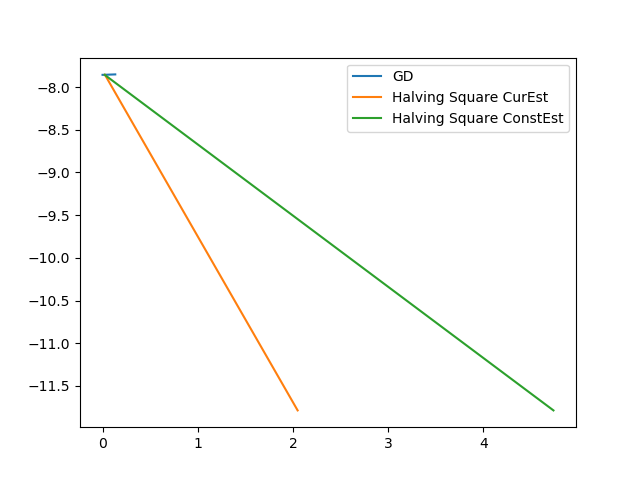

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook

bad = ['Ellipsoid Method']
keys = results.keys()
for key in keys:
    if not key in bad:
        y, x = results[key]
        x = [i - x[0] for ind, i in enumerate(x[1:])]
        y = [f.calculate_function(i[0], i[1]) for i in y]
        plt.plot(x, y)
plt.legend(list(keys))

In [8]:
bad = ['Ellipsoid Method']
for key in keys:
    if not key in bad:
        y, x = results[key]
        x = [i - x[0] for ind, i in enumerate(x[1:])][:40]
        y = [f.calculate_function(i[0], i[1]) for i in y[:40]]
        print(key, y)

GD [-17.744313501776922, -19.705342641937534, -19.703642643812465, -19.70194264567628, -19.70024264754045, -19.69854264941646, -19.696842651297157, -19.69514265315808, -19.69344265503949, -19.691742656916954, -19.690042658783273, -19.688342660654282, -19.6866426625285, -19.684942664395894, -19.68324266629099, -19.681542668139812, -19.679842670027586, -19.678142671919446, -19.676442673792977, -19.67474267565821, -19.67304267753964, -19.67134267942577, -19.669642681296413, -19.667942683183274, -19.666242685066166, -19.664542686949417, -19.66284268880997, -19.66114269070982, -19.659442692578292, -19.657742694462993, -19.65604269633652, -19.65434269822629, -19.652642700080893, -19.650942702002585, -19.64924270384709, -19.647542705737, -19.645842707624244, -19.644142709497636, -19.64244271140852, -19.640742713280964]
Halving Square CurEst [-17.744313501776922, -7.96059358397762, -6.921826585268379]
Halving Square ConstEst [-17.744313501776922, -7.96059358397762]
